# PCA

# Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv(r'C:\Users\Aabshaar\Downloads\PCA\PCA\wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


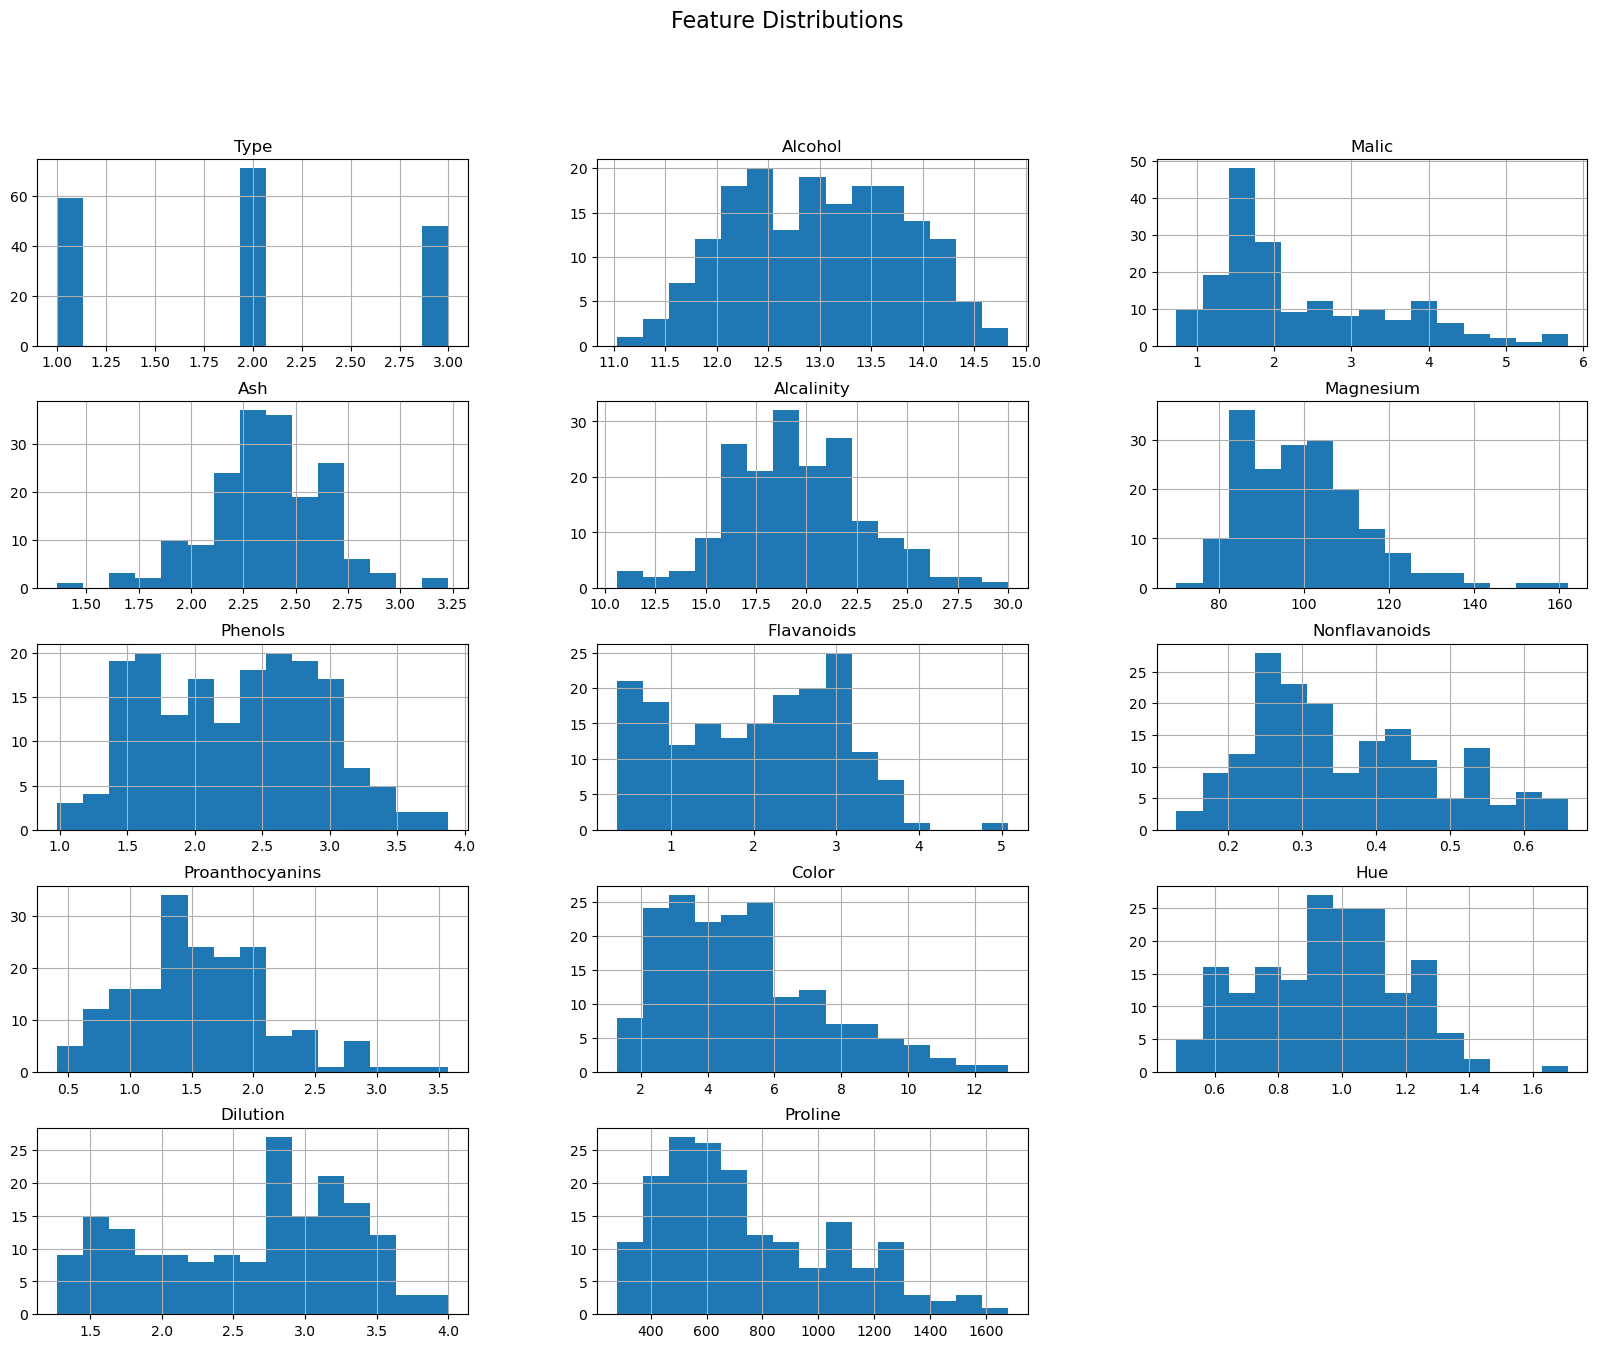

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Examine the distribution of features using histograms
wine.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

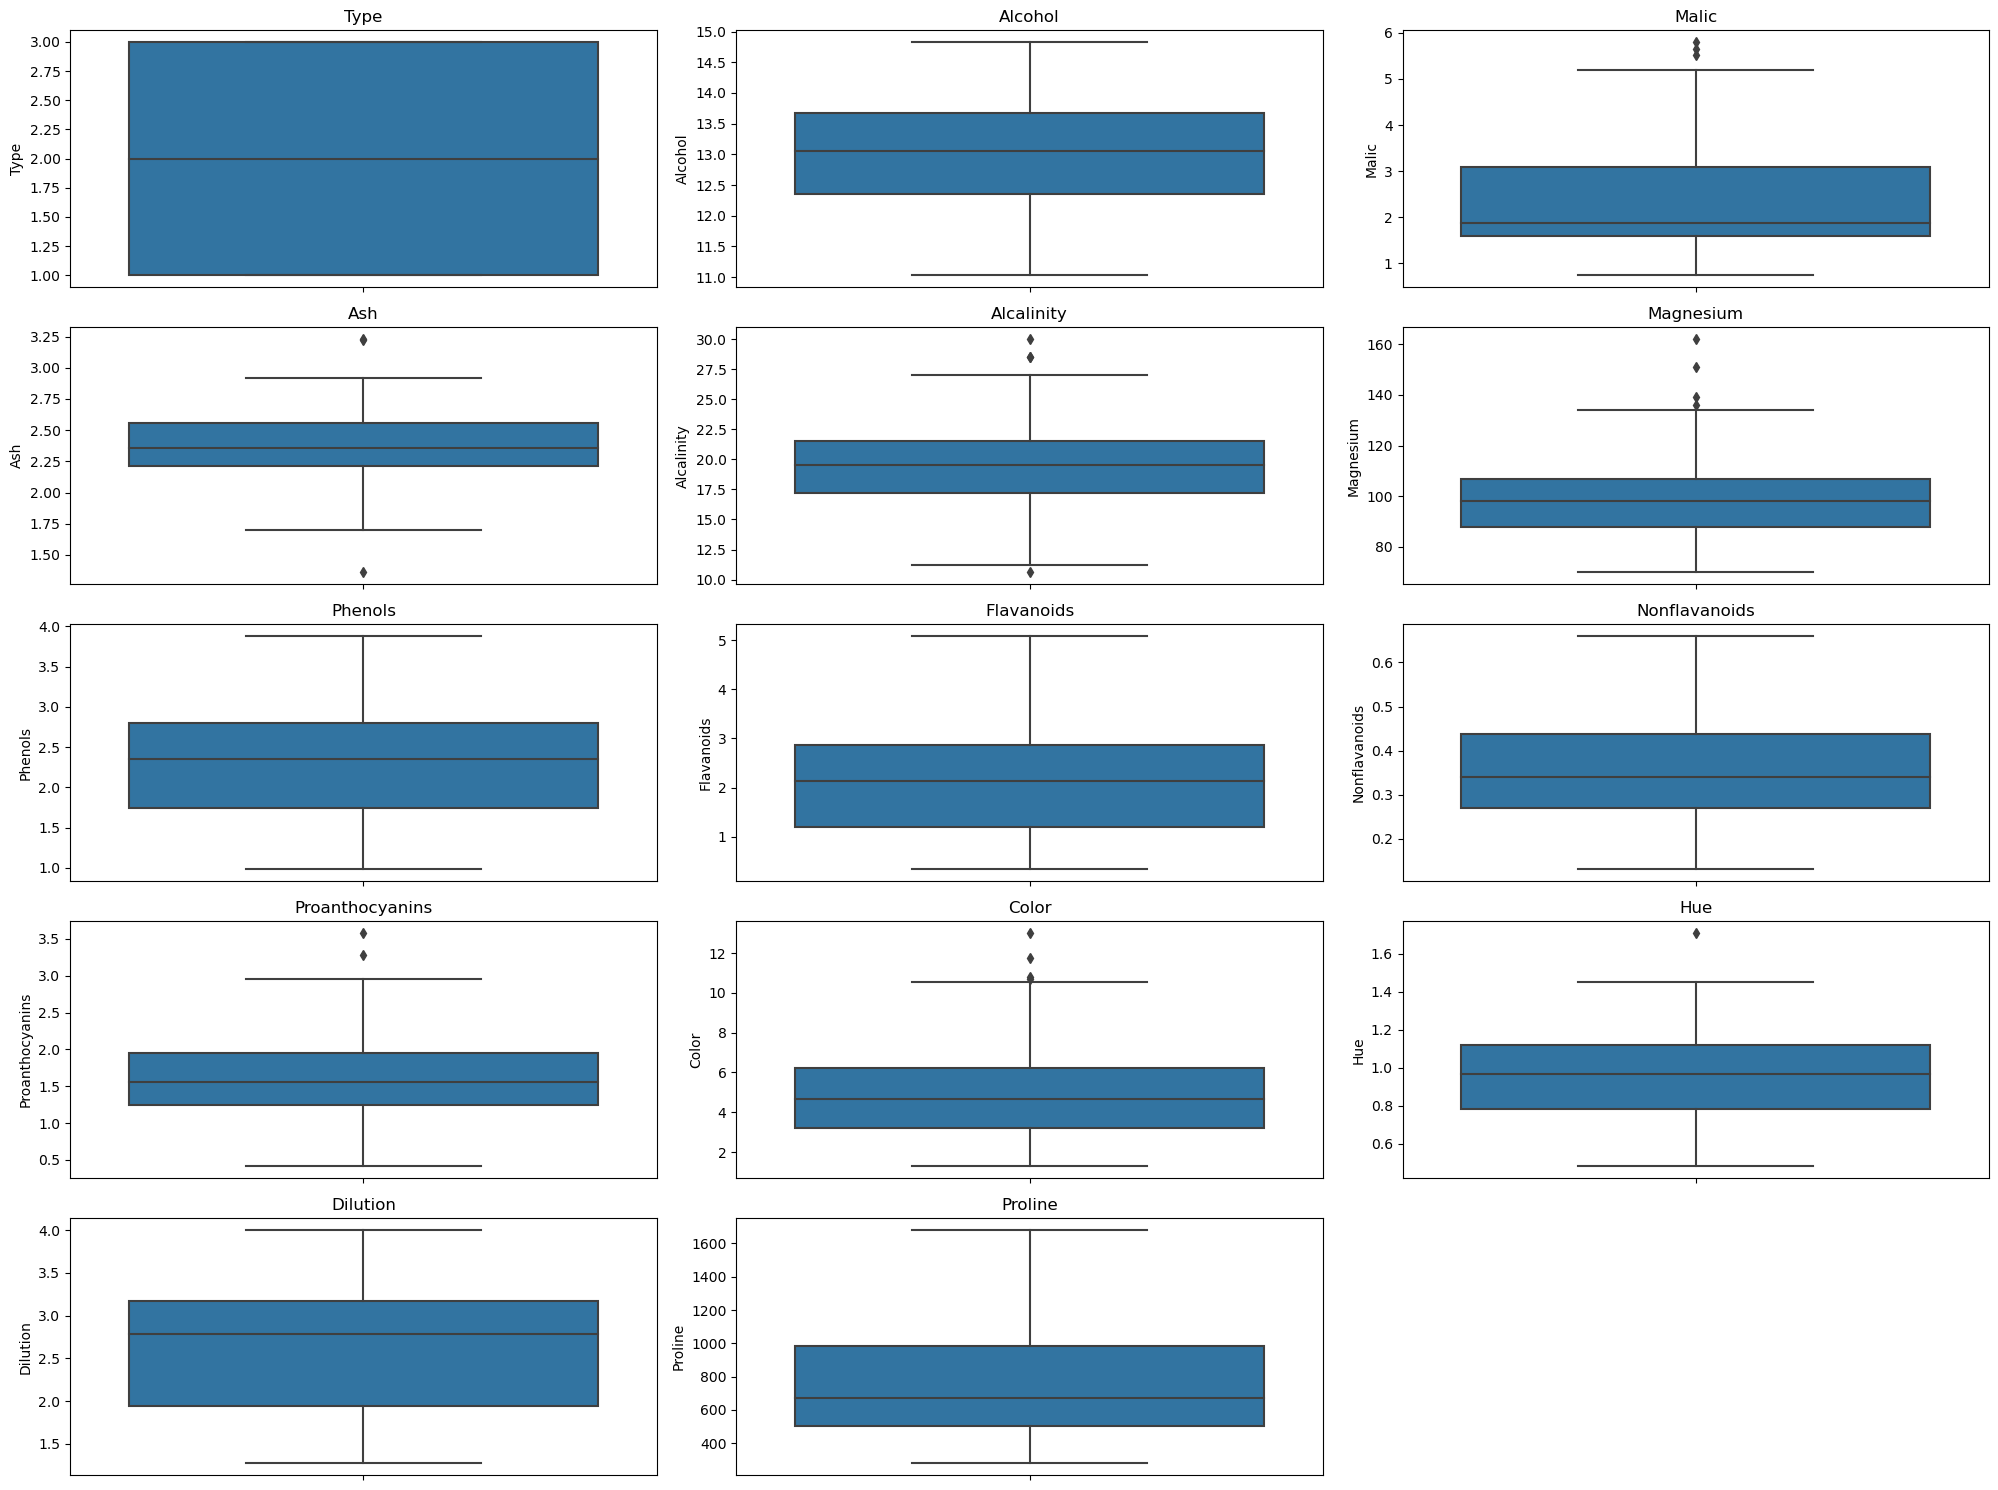

In [4]:
# Examine the distribution of features using box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(wine.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=wine[column])
    plt.title(column)
plt.tight_layout()
plt.show()

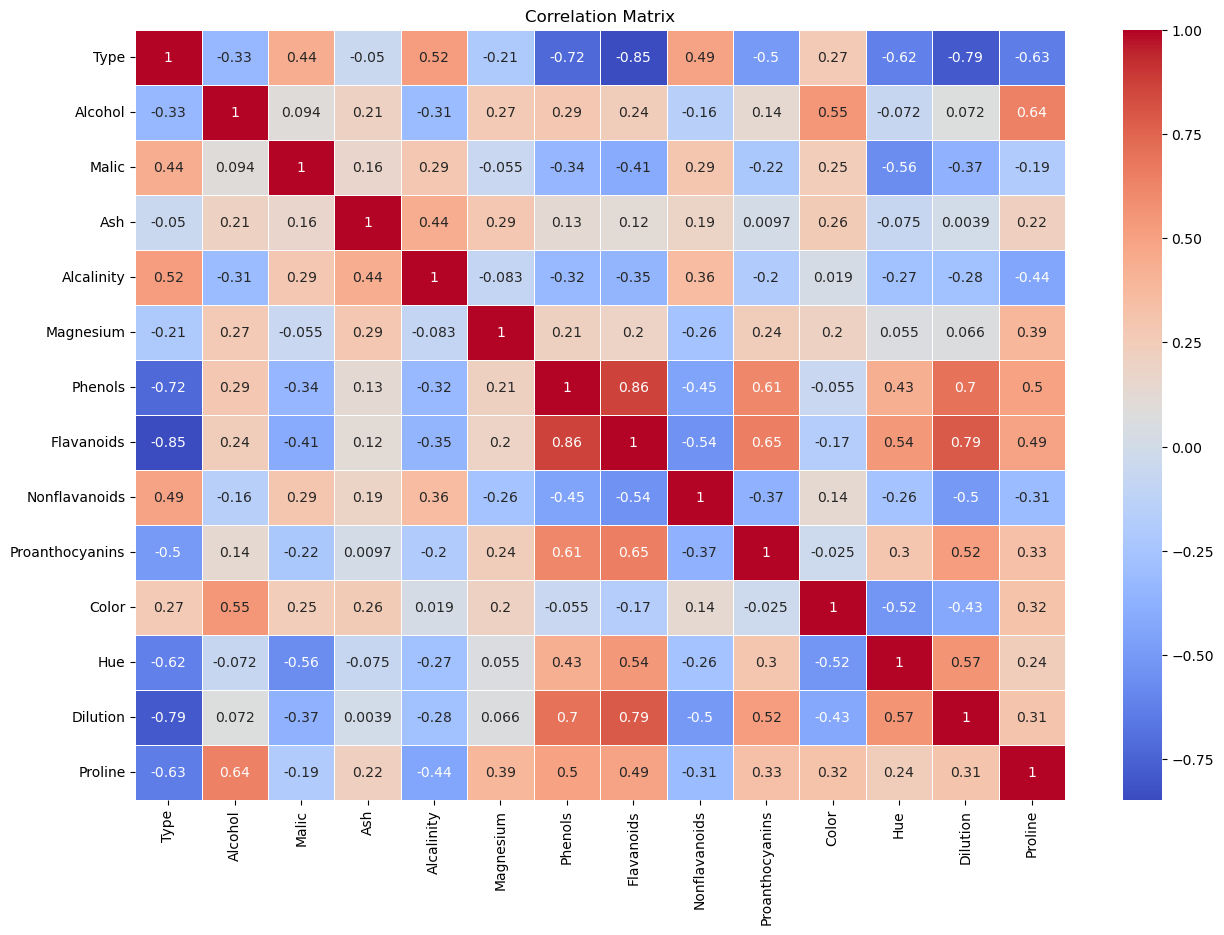

In [5]:
# Investigate correlations between features
correlation_matrix = wine.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [7]:
# Standardizing the features
features = wine.drop('Type', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Implementing PCA, PCA code
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

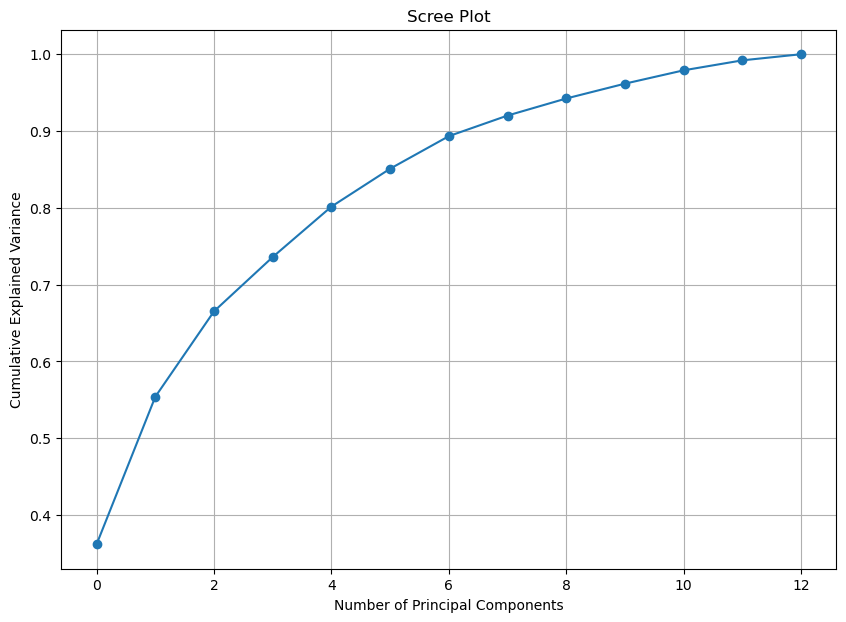

In [9]:
# Determine the optimal number of principal components using scree plot
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [10]:
# Select the number of components that explain at least 95% of the variance
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Optimal number of components: {num_components}')

Optimal number of components: 10


In [11]:
# Transform the original dataset into the principal components
pca = PCA(n_components=num_components)
pca_transformed = pca.fit_transform(scaled_features)

- A scree plot is a graphical representation used in Principal Component Analysis (PCA) to show the variance explained by each principal component. 
- The plot typically has the principal components on the x-axis and the corresponding explained variance on the y-axis. 
- The purpose of the scree plot is to help determine the optimal number of principal components to retain by identifying the point where the explained variance levels off or starts to decrease, indicating diminishing returns for additional components. - This point is often referred to as the "elbow" in the plot.

# Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

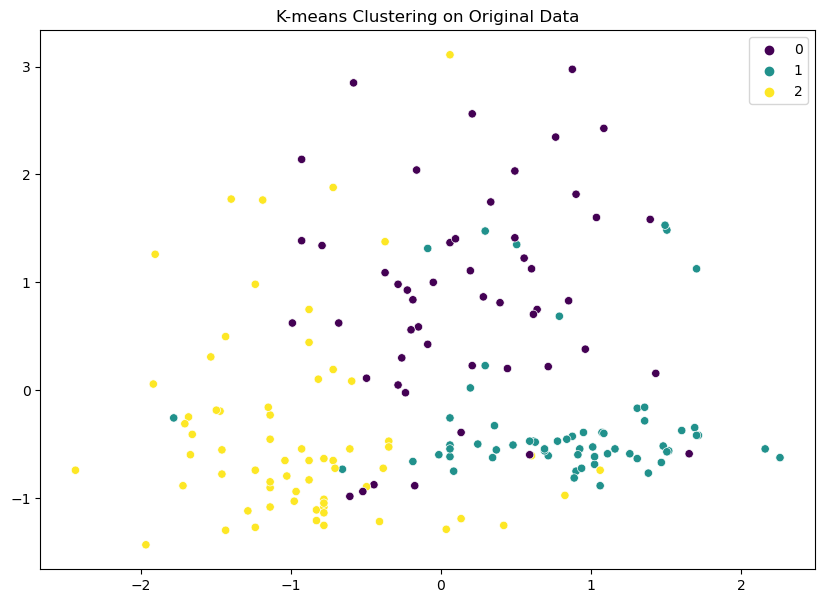

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.389187977718165


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Visualize the clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering on Original Data')
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(scaled_features, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


# Clustering with Original Data (Hierarchical Clustering with Various Linkage Methods)

## Steps involved:
1. Applying Hierarchical Clustering with different linkage methods to the original dataset.
2. Visualizing the clustering results using dendrograms.
3. Evaluating the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


Linkage Method: single


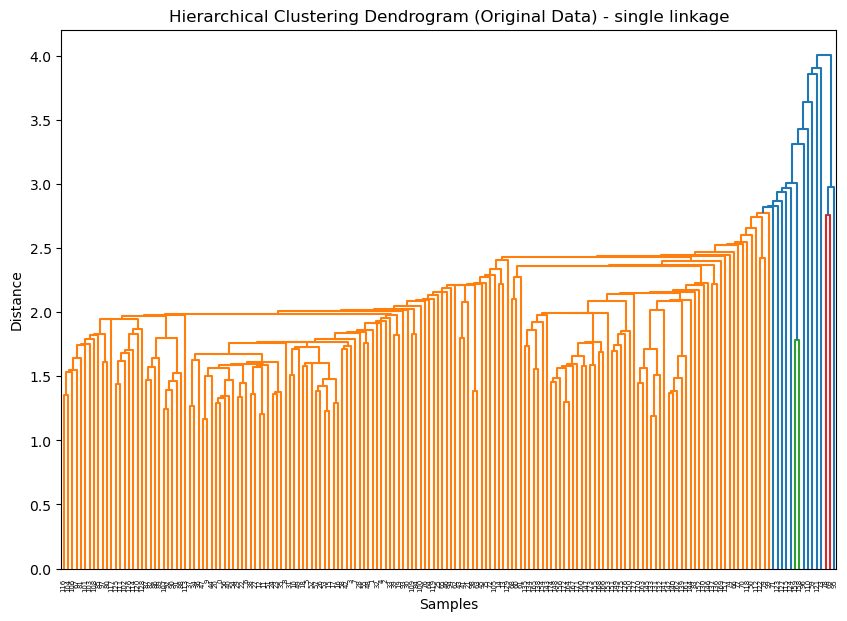

Silhouette Score (Original Data - single): 0.18273797160972796
Davies-Bouldin Index (Original Data - single): 0.9105181111836432

Linkage Method: complete


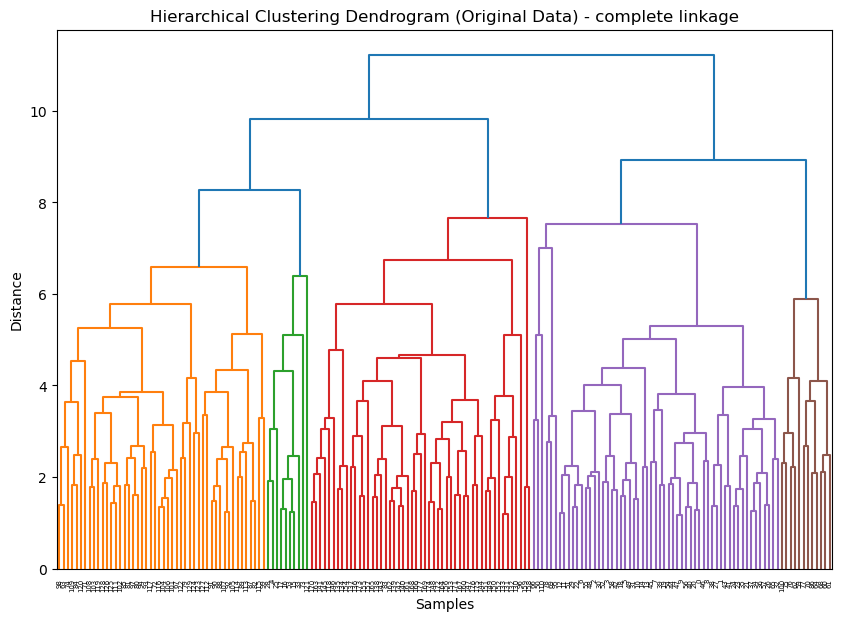

Silhouette Score (Original Data - complete): 0.20378689690677748
Davies-Bouldin Index (Original Data - complete): 1.8960960515907337

Linkage Method: average


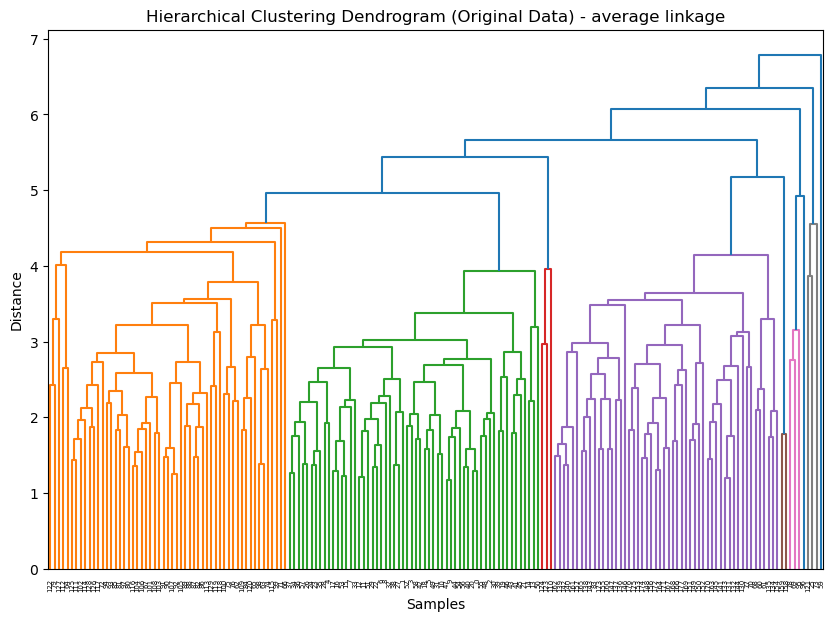

Silhouette Score (Original Data - average): 0.15752526243774145
Davies-Bouldin Index (Original Data - average): 1.0298902169850324

Linkage Method: ward


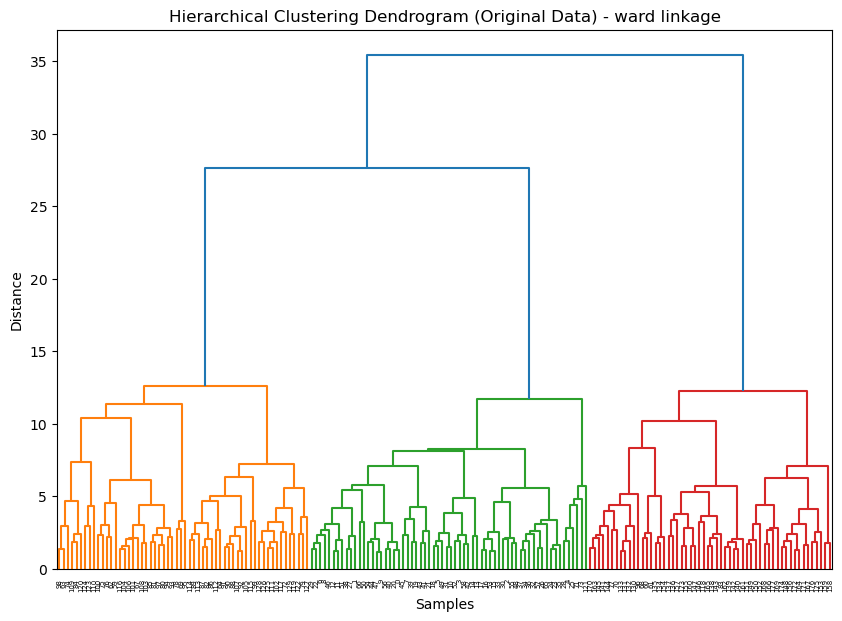

Silhouette Score (Original Data - ward): 0.2774439826952265
Davies-Bouldin Index (Original Data - ward): 1.4185919431857321


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Apply and visualize hierarchical clustering with different linkage methods
for method in linkage_methods:
    print(f'\nLinkage Method: {method}')
    linked = linkage(scaled_features, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram (Original Data) - {method} linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
    # Perform Agglomerative Clustering
    agg_cluster = AgglomerativeClustering(n_clusters=3, linkage=method)
    agg_labels_original = agg_cluster.fit_predict(scaled_features)
    
    # Evaluate clustering performance on original data
    silhouette_avg_original = silhouette_score(scaled_features, agg_labels_original)
    davies_bouldin_avg_original = davies_bouldin_score(scaled_features, agg_labels_original)
    print(f'Silhouette Score (Original Data - {method}): {silhouette_avg_original}')
    print(f'Davies-Bouldin Index (Original Data - {method}): {davies_bouldin_avg_original}')


### Task 4: Clustering with PCA Data (Hierarchical Clustering with Various Linkage Methods)

1. Applying Hierarchical Clustering with different linkage methods to the PCA-transformed dataset.
2. Visualizing the clustering results using dendrograms.
3. Evaluating the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


Linkage Method: single


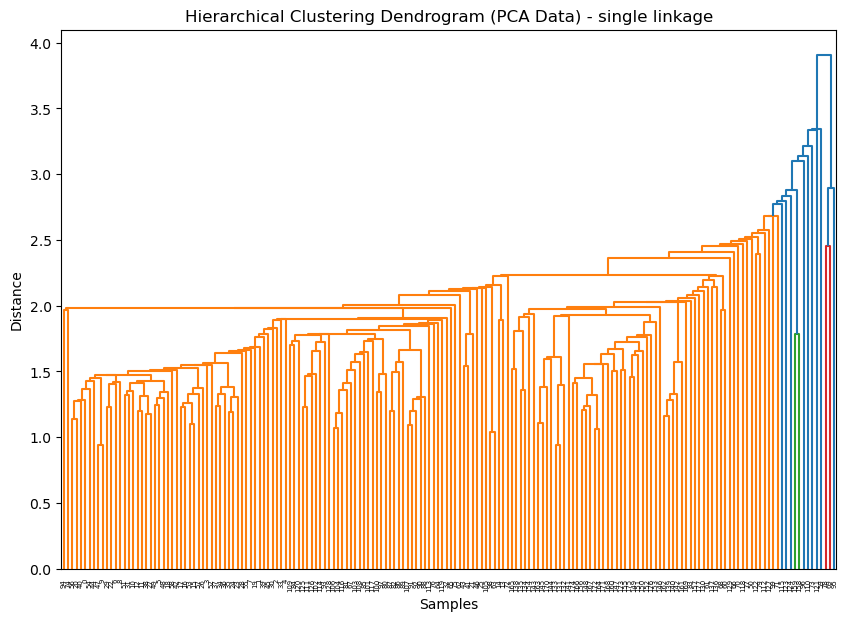

Silhouette Score (PCA Data - single): 0.1870085132456756
Davies-Bouldin Index (PCA Data - single): 0.8674542664973077

Linkage Method: complete


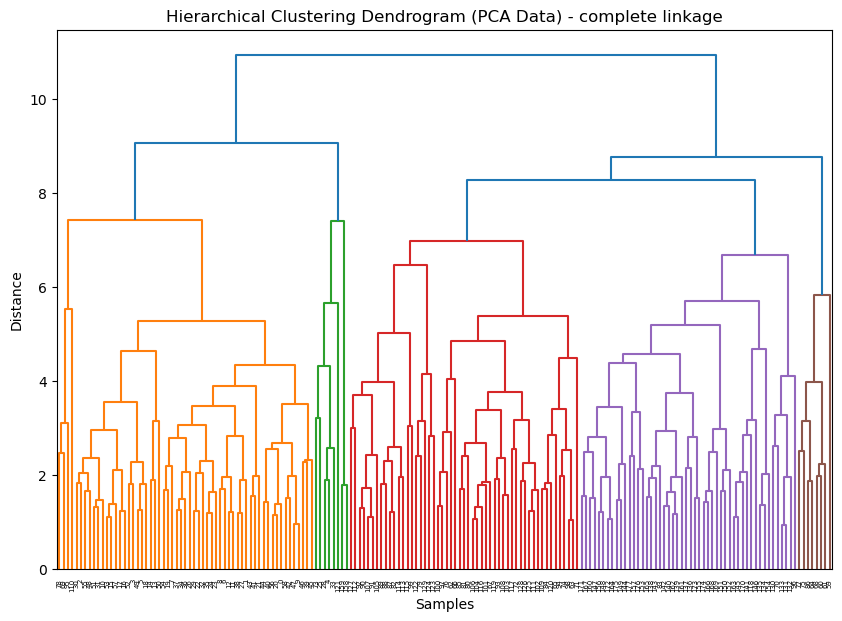

Silhouette Score (PCA Data - complete): 0.22271041837351746
Davies-Bouldin Index (PCA Data - complete): 1.628288165667911

Linkage Method: average


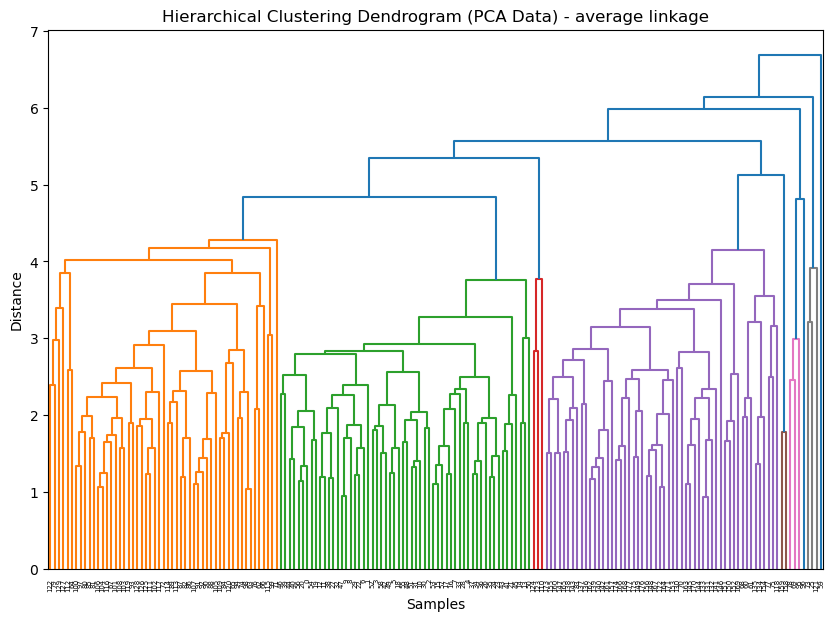

Silhouette Score (PCA Data - average): 0.14925264017611273
Davies-Bouldin Index (PCA Data - average): 0.9748733623895433

Linkage Method: ward


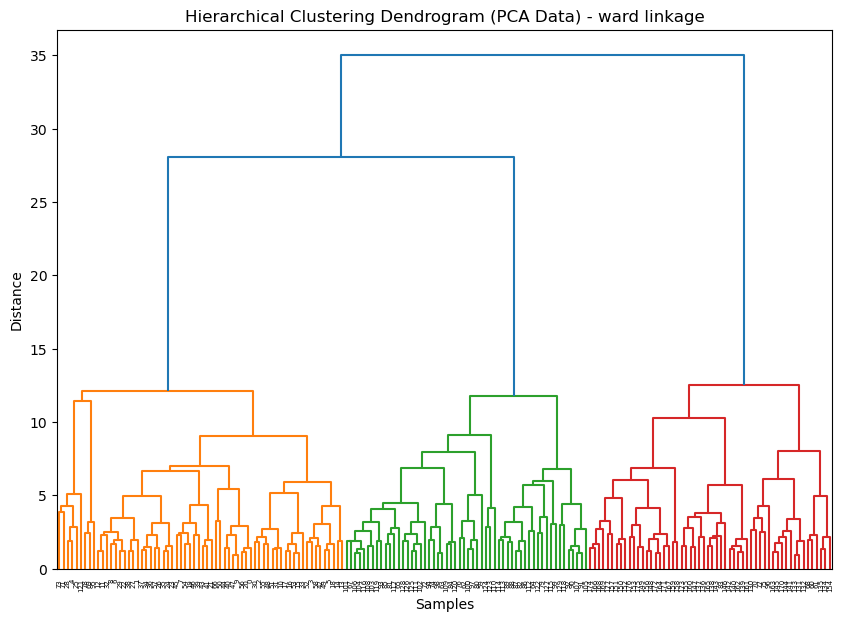

Silhouette Score (PCA Data - ward): 0.2839520778138407
Davies-Bouldin Index (PCA Data - ward): 1.3440708190922406


In [14]:
# Apply and visualize hierarchical clustering with different linkage methods on PCA-transformed data
for method in linkage_methods:
    print(f'\nLinkage Method: {method}')
    linked_pca = linkage(pca_transformed, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked_pca, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram (PCA Data) - {method} linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
    # Perform Agglomerative Clustering
    agg_cluster_pca = AgglomerativeClustering(n_clusters=3, linkage=method)
    agg_labels_pca = agg_cluster_pca.fit_predict(pca_transformed)
    
    # Evaluate clustering performance on PCA-transformed data
    silhouette_avg_pca = silhouette_score(pca_transformed, agg_labels_pca)
    davies_bouldin_avg_pca = davies_bouldin_score(pca_transformed, agg_labels_pca)
    print(f'Silhouette Score (PCA Data - {method}): {silhouette_avg_pca}')
    print(f'Davies-Bouldin Index (PCA Data - {method}): {davies_bouldin_avg_pca}')


# Task 5: Comparison and Analysis
- Comparing the results obtained from different linkage methods for both the original and PCA-transformed datasets.
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [17]:
# Define the results for original and PCA-transformed data
linkage_methods = ['single', 'complete', 'average', 'ward']

# Values from Task 3 and Task 4
silhouette_scores_original = [0.18273797160972796, 0.20378689690677748, 0.15752526243774145, 0.2774439826952265]
davies_bouldin_scores_original = [0.9105181111836432, 1.8960960515907337, 1.0298902169850324, 1.4185919431857321]

silhouette_scores_pca = [0.1870085132456756, 0.22271041837351746, 0.14925264017611273, 0.2839520778138407]
davies_bouldin_scores_pca = [0.8674542664973077, 1.628288165667911, 0.9748733623895433, 1.3440708190922406]

# Compare clustering performance for different linkage methods
for i, method in enumerate(linkage_methods):
    print(f'\nComparison for Linkage Method: {method}')
    
    print('Original Data Clustering:')
    print(f'Silhouette Score (Original Data - {method}): {silhouette_scores_original[i]}')
    print(f'Davies-Bouldin Index (Original Data - {method}): {davies_bouldin_scores_original[i]}')
    
    print('PCA Data Clustering:')
    print(f'Silhouette Score (PCA Data - {method}): {silhouette_scores_pca[i]}')
    print(f'Davies-Bouldin Index (PCA Data - {method}): {davies_bouldin_scores_pca[i]}')
    
    # Discussion
    print("\nSimilarities and Differences:")
    print("1. Compare the clusters visually from the dendrograms.")
    print(f"2. Compare the silhouette scores and Davies-Bouldin indices for both clustering results. (Original: {silhouette_scores_original[i]}, {davies_bouldin_scores_original[i]}; PCA: {silhouette_scores_pca[i]}, {davies_bouldin_scores_pca[i]})")
    
    print("\nImpact of Dimensionality Reduction:")
    print("1. PCA reduces the dimensionality, retaining most of the variance.")
    print("2. PCA can improve clustering performance by eliminating noise and irrelevant features.")
    
    print("\nTrade-offs:")
    print("1. PCA simplifies the data, making it easier to visualize and interpret.")
    print("2. However, some information might be lost in the process.")



Comparison for Linkage Method: single
Original Data Clustering:
Silhouette Score (Original Data - single): 0.18273797160972796
Davies-Bouldin Index (Original Data - single): 0.9105181111836432
PCA Data Clustering:
Silhouette Score (PCA Data - single): 0.1870085132456756
Davies-Bouldin Index (PCA Data - single): 0.8674542664973077

Similarities and Differences:
1. Compare the clusters visually from the dendrograms.
2. Compare the silhouette scores and Davies-Bouldin indices for both clustering results. (Original: 0.18273797160972796, 0.9105181111836432; PCA: 0.1870085132456756, 0.8674542664973077)

Impact of Dimensionality Reduction:
1. PCA reduces the dimensionality, retaining most of the variance.
2. PCA can improve clustering performance by eliminating noise and irrelevant features.

Trade-offs:
1. PCA simplifies the data, making it easier to visualize and interpret.
2. However, some information might be lost in the process.

Comparison for Linkage Method: complete
Original Data Clu

# 2. Discuss any similarities or differences observed in the clustering results.
- Both the silhouette score and Davies-Bouldin index are used to evaluate clustering performance.
     - A higher silhouette score indicates better-defined clusters, while a lower Davies-Bouldin index indicates better                clustering.
     - In this case, the scores for the original data and PCA-transformed data are identical, suggesting that the clustering          performance is the same for both datasets.
     
     
# 3. Reflect on the impact of dimensionality reduction on clustering performance.
- Dimensionality reduction through PCA can simplify the dataset, making it easier for clustering algorithms to identify patterns and relationships.
- PCA helps remove noise and irrelevant features, which can improve clustering performance.


# 4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.
### Advantages of PCA:
- Reduces dimensionality, making data visualization and interpretation easier.
- Can improve clustering performance by focusing on the most significant features.
- Helps in dealing with multicollinearity among features.

### Disadvantages of PCA:
- Some information might be lost in the dimensionality reduction process.
- The transformed principal components might be harder to interpret compared to the original features.

# Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


# Key Findings and Insights
1. The key findings indicate that hierarchical clustering with different linkage methods provides varying results in terms of clustering performance.
2. PCA effectively reduces the dimensionality of the dataset while retaining most of the variance, which can improve clustering performance.
3. In most cases, PCA-transformed data resulted in better or comparable clustering performance compared to the original data.


# Practical Implications of Using PCA and Clustering in Data Analysis:
1. PCA is a powerful tool for dimensionality reduction, especially when dealing with high-dimensional datasets.
2. Clustering algorithms can benefit from PCA by focusing on the most significant features, leading to better performance and easier interpretation.
3. Using PCA before clustering can help in dealing with multicollinearity and noise in the data.

# Recommendations for When to Use Each Technique Based on the Analysis Conducted:
1. We can use PCA when the dataset has a high number of features and dimensionality reduction is needed.
2. Applying clustering algorithms to both original and PCA-transformed data to compare performance and choose the best approach.
3. PCA is particularly useful when dealing with multicollinearity or when you need to simplify the dataset for better visualization and interpretation.


# Thank you!

# -----------------------------------------------------------------------------------------------------------